In [20]:
from tabula import read_pdf
import pandas as pd
import seaborn as sns
import re
import matplotlib

In [2]:
def get_emissions_table_from_page_1353():
    """Page 1353 from the PDF document, is 1335 IN the document!"""
    df = read_pdf("/home/martin/Downloads/ipcc_wg3_ar5_full.pdf", pages=1353)[0]
    return df

In [3]:
df = get_emissions_table_from_page_1353()

In [4]:
df

,Options,Direct emissions,Infrastructure & supply\rchain emissions,Biogenic CO2 emissions\rand albedo effect,Methane emissions,Lifecycle emissions\r(incl. albedo effect)
0,NaN,Min / Median / Max,Typical values,Min / Median / Max,NaN,NaN
1,Currently Commercially Available Technologies,NaN,NaN,NaN,NaN,NaN
2,Coal — PC,670 / 760 / 870,9.6,0,47,740 / 820 / 910
3,Gas — Combined Cycle,350 / 370 / 490,1.6,0,91,410 / 490 / 650
4,Biomass — cofiring,n. a. ii,–,–,–,620 / 740 / 890iii
5,Biomass — dedicated,n. a. ii,210,27,0,130 / 230 / 420iv
6,Geothermal,0,45,0,0,6.0 / 38 / 79
7,Hydropower,0,19,0,88,1.0 / 24 / 2200
8,Nuclear,0,18,0,0,3.7 / 12 / 110
9,Concentrated Solar Power,0,29,0,0,8.8 / 27 / 63


In [14]:
df

,Options,Direct emissions,Infrastructure & supply\rchain emissions,Biogenic CO2 emissions\rand albedo effect,Methane emissions,Lifecycle emissions\r(incl. albedo effect)
0,NaN,Min / Median / Max,Typical values,Min / Median / Max,NaN,NaN
1,Currently Commercially Available Technologies,NaN,NaN,NaN,NaN,NaN
2,Coal — PC,670 / 760 / 870,9.6,0,47,740 / 820 / 910
3,Gas — Combined Cycle,350 / 370 / 490,1.6,0,91,410 / 490 / 650
4,Biomass — cofiring,n. a. ii,–,–,–,620 / 740 / 890iii
5,Biomass — dedicated,n. a. ii,210,27,0,130 / 230 / 420iv
6,Geothermal,0,45,0,0,6.0 / 38 / 79
7,Hydropower,0,19,0,88,1.0 / 24 / 2200
8,Nuclear,0,18,0,0,3.7 / 12 / 110
9,Concentrated Solar Power,0,29,0,0,8.8 / 27 / 63


In [25]:
def extract_numbers(string):
    return re.findall(r'\d+', string)

In [27]:
extract_numbers("123/123/3123")

['123', '123', '3123']

In [29]:
df["Lifecycle emissions\r(incl. albedo effect)"].str.extract('(\d+')

ValueError: pattern contains no capture groups

In [23]:
numbers

['130', '230', '420']

In [16]:
# Clean Data
# Separate Lifecycle Emissions into Min, Median and Max columns
df_split = df["Lifecycle emissions\r(incl. albedo effect)"].str.split("/", expand=True)
df_split.columns = ["Min", "Median", "Max"]

In [17]:
df_split

,Min,Median,Max
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,740,820,910
3,410,490,650
4,620,740,890iii
5,130,230,420iv
6,6.0,38,79
7,1.0,24,2200
8,3.7,12,110
9,8.8,27,63


In [ ]:
# Extract Options column with Lifecycle Emissions 3 min,median and max colunms

In [13]:
# Visualize DataFrame

In [11]:
df["Lifecycle emissions\r(incl. albedo effect)"][2]

'740 / 820 / 910'

<Axes: >

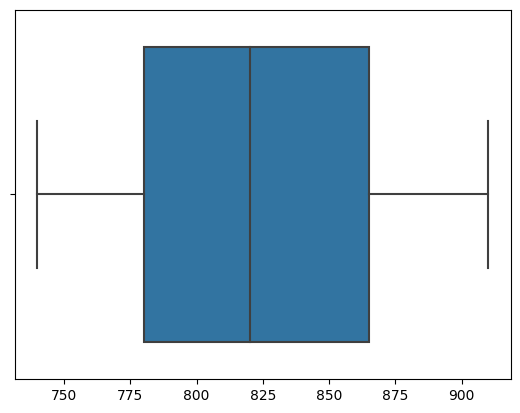

In [12]:
# Visualize Line 2, Cells Options and Lifecycle emisisons
# Options for labels, Lifecycle emissions for data
sns.boxplot(x=[740, 820, 910])
